#**Feature Engineering for Machine Learning**
In machine learning, features are measurable properties present in dataset which is used to train the predictive machine learning model,features are individual independent variables that act like a input in our system.while making the predictions, models use such features to make the predictions. And using the feature engineering process in details.

The feature engineering pipeline is the preprocessing steps that transform raw data into features that can be used in machine learning algorithms, such as predictive models.

The main goal of feature engineering and selection is to improve the performance of machine learning (ML) algorithms.
## **Sources of Secondary Data:**


- [Kaggle dataset]( https://www.kaggle.com/datasets)
- [Amazon dataset]( https://registry.opendata.aws/)
- [Google Dataset]( https://datasetsearch.research.google.com/)
- [UCI dataset]( http://archive.ics.uci.edu/ml/datasets/)
etc.

# **List of Techniques Used In Feature Engineering process:**
- **Missing Data Imputation:**Imputation deals with handling missing values in data. While deleting records that are missing certain values is one way of dealing with this issue, it could also mean losing out on a chunk of valuable data. This is where imputation can help. It can be broadly classified into two types. Namely:

  **Categorical Imputation:** Missing categorical values are generally replaced by the most commonly occurring value in other records
 
 **Numerical Imputation:** Missing numerical values are generally replaced by the mean of the corresponding value in other records
- **Handling Outliers:**Outliers are unusually high or low values in the dataset which are unlikely to occur in normal scenarios. Since these outliers could adversely affect your prediction they must be handled appropriately. 
- **Features/variables Transformation:**Variable transformation techniques could help with normalizing skewed data. One such popularly used transformation is the logarithmic transformation.
- **Feature selection:**Selecting relevant features from given the dataset.
- **Creating Feature:**Feature creation involves deriving new features from existing ones. This can be done by simple mathematical operations such as aggregations to obtain the mean, median, mode, sum, or difference and even product of two values. 
- **Imbalanced data handling:** proper handling imbalanced data either by removal, downsampling, and oversampling etc.
- **Feature Scaling/feature normalization:**Feature scaling is done owing to the sensitivity of some machine learning algorithms to the scale of the input values. This technique of feature scaling is sometimes referred to as feature normalization.

   **Min-Max Scaling:** This process involves the rescaling of all values in a feature in the range 0 to 1. In other words, the minimum value in the original range will take the value 0, the maximum value will take 1 and the rest of the values in between the two extremes will be appropriately scaled.
   
 **Standardization/Variance scaling:** All the data points are subtracted by their mean and the result divided by the distribution's variance to arrive at a distribution with a 0 mean and variance of 1.


- **Features Splitting:**Splitting features into parts can sometimes improve the value of the features toward the target to be learned.
- **Discretization:**Discretization involves essentially taking a set of values of data and grouping sets of them together in some logical fashion into bins (or buckets). Binning can apply to numerical values as well as to categorical values.
- **Categorical encoding:**Categorical encoding is the technique used to encode categorical features into numerical values which are usually simpler for an algorithm to understand. One hot encoding(OHE)  is a popularly used technique of categorical encoding.







# **Major types of features/Variables in Feature Engineering:**
- **Numerical Variables:**Numerical variables have values as numbers.They are two types as follows,
 
 **Discrete variables:** whole numbers values,cannot contain any fractional numbers as a value.
 
 eg.Number of product.

   **Continuous variables:** Values can be any number but within a certain range.  eg. Price of product.

- **Categorical Variables:**Most machine learning algorithms cannot handle categorical variables unless we convert them to numerical values. These are values selected from a group of categories, also called labels.They are mainly two types as follows,

  **Nominal:** No particular order between values.
  
  eg.Tapendra,Binita,Dad,Mom,Brother.

  **Ordinal:** There is some order between values.

  eg.A,B,C,D,...,Jan,feb,mar,....


  - **Date/Time Variables:**Dates and times are rich sources of information that can be used with machine learning models. However, these datetime variables do require some feature engineering to turn them into numerical data.

  eg.Date of Birth. 1995-12-17, time 07:08:17 PM

  - **Mixed Variables:**Number and category together as the values.

  eg.Bike number,Car number.....




#**Import Essential libraries:**

In [ ]:
import numpy as np                 # support multi-dimensional arrays and matrices
import matplotlib.pyplot as plt    # for visualization
import pandas as pd                # for dataframe manipulation
import sklearn                     #algorithms support
import seaborn as sns              # data visualized and analysis using the heat map,boxplot for outlier detection. 
import missingno as mno            # for missing value visualization

#### **The data set used is obtained from kaggle data sets and the link is here:**
Taking the dataset of California housing prices from this link
www.kaggle.com

In [ ]:
from google.colab import drive   ##mount your Google Drive in your virtual machine(VM).
drive.mount('/gdrive')           ##Access  the drive because of different server of colab and drive. 

Mounted at /gdrive


In [ ]:
house_dataset=pd.read_csv('/gdrive/My Drive/ML Project /Feature Engineering /1.Fundamentals of Feature Engineering for ML/housing_data.csv',quoting=3)
                                 ##Read data file with path location step by step path location from My Drive.

In [ ]:
house_dataset.head()              ##Show top 5 data point head.

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,NaN,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,NaN,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
house_dataset=house_dataset.drop(columns='Unnamed: 0', axis=1)  #Drop the Unnamed:0 columns
house_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,NaN,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,NaN,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- From above dataset we find that Variables housing_median_age,total_rooms, Population,households,median_house_value etc. are discrete variables and median_income, Latitude are continuous variables.

# **Missing Data:**
- The main cause of data missing are lost ,not stored,don't exist,data not found etc.
- Missing data represent by NaN(Not a Number) and using   **df.isnull().sum()** to find all list of NaN value.

- From below code we find that the  variable **longitude** has 2 missing values,**total_rooms** has 9 missing values,**total_bedrooms** has 207 missing values.



In [ ]:
print(house_dataset.isnull().sum()) # Print the number of nulls per feature.

longitude               2
latitude                0
housing_median_age      0
total_rooms             9
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


##**Types of  missing data are:**
**Missing At Random (MAR):** 
- MAR means the missingness depends on data.Missing at random (MAR) means that the reason for missing values can be explained by variables on which you have complete information as there is some relationship between the missing data and other values/data.
- For Example the "wages" of employes depend on the "working_hours",if some employes wages is missing then it depend on the working_hours.


**Missing Completely at Random (MCAR):**
- In this case, there is no relationship between the missing data and any other values observed or unobserved (the data which is not recorded) within the given dataset.That is, missing values are completely independent of other data.The missing data are just a random subset of the data.
- For Example, suppose in a library there are some  books. Some values of  books in the computer system are missing. The reason might be a human error like the librarian forgot to type in the values. So, the missing values of books are not related to any other variable/data in the system.

**Missing Not at Random (MNAR):**
- Missing values depend on the unobserved data(the data which is not recorded)  that is, the missingness is related to events or factors which are not measured by the researcher. 


##**Imputation of Missing Data:**
There are three main missing value imputation techniques – mean, median and mode.Mean, median, and mode are the three measures of central tendency in statistics. Mean is the average of all values in a set, the median is the middle value when a data set is ordered from least to greatest, and mode is the most common numerical value for two or more sets.


**Note:** Handle the missing value for **categorical variables(like Male, Female)** in the dataset are as follows:

- Replace missing values with the **most frequent value**.You can always impute them based on **Mode** in the case of categorical variables, just make sure you don’t have highly skewed class distributions.
-For Example, if feature column have **Male** and **Female** data point and some of them are missing, then find the most frequent value and replace by this most frequent value in missing categorical variables.

##**How to decide which imputation technique to use:**
- **In Positive/Right Skew =** Mean > Median > Mode
- **In Negative/Left Skew=** Mode >Median >Mean
- **In Symmetrical Distribution=** Mean $\approx$ Median$\approx$Mode


- Plots such as **box plots** and **distribution plots** come very handily in deciding which techniques to use.

###**Boxplot:**
- Here is what the box plot would look like. You may **note that the data is skewed.** 
- There are several or large numbers of data points that act as **outliers.**
- Outliers data points will have a significant impact on the mean and hence, in such cases, it is not recommended to use the mean for replacing the missing values. 
- Using mean values for replacing missing values may not create a great model and hence gets ruled out.
- For symmetric data distribution, you can use the mean value for imputing missing values
-Thus, you have to **use either median or mode.**



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


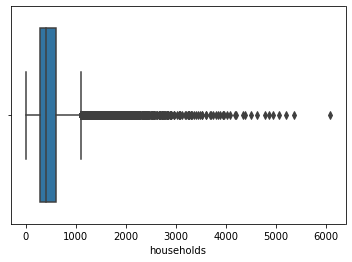

In [ ]:
sns.boxplot(house_dataset['households']) #Seaborn boxplot.


##**Distrbution plot:**
- The data looks to be **right-skewed (long tail in the right).**

- Thus, you have to **use either median or mode.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


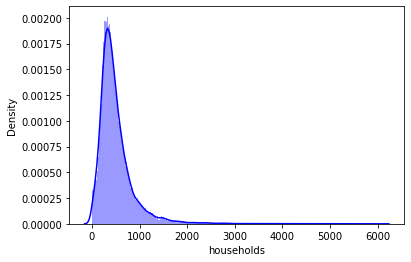

In [ ]:
sns.distplot(house_dataset['households'], kde = True, color ='blue',bins='auto') 

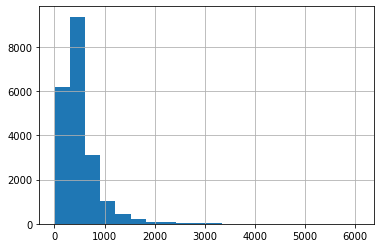

In [ ]:
house_dataset["households"].hist(bins=20)

##**Impute/Replace Missing Values with Median:**

In [ ]:
print(house_dataset['longitude'].quantile(0.50)) #50th percentile value, or the median.
print(house_dataset['total_rooms'].quantile(0.50)) #50th percentile value, or the median.
print(house_dataset['total_bedrooms'].quantile(0.50)) #50th percentile value, or the median.


-118.49
2127.0
435.0


In [ ]:
house_dataset['longitude']=house_dataset['longitude'].fillna(house_dataset['longitude'].median())
house_dataset['total_rooms']=house_dataset['total_rooms'].fillna(house_dataset['total_rooms'].median())
house_dataset['total_bedrooms']=house_dataset['total_bedrooms'].fillna(house_dataset['total_bedrooms'].median())

house_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.49,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-118.49,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
print(house_dataset.isnull().sum()) # Print the number of nulls per feature if any.

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# **Correlation matrix:**
 Find the correlation between all independent variables of the dataset.Statisticians and data analysts measure correlation of two numerical variables to find an insight about their relationships.

Pandas dataframe's method **.corr()** can be used to compute the correlation matrix.

The correlation coefficient is a value that indicates the strength of the relationship between variables. The coefficient can take any values from -1 to 1. The interpretations of the values are:

- **-1: Perfect negative correlation.** The variables tend to move in opposite directions (i.e., when one variable increases, the other variable decreases).
- **0: No correlation.** The variables do not have a relationship with each other.
- **1: Perfect positive correlation.** The variables tend to move in the same direction (i.e., when one variable increases, the other variable also increases).

###**Formula:**
The correlation coefficient that indicates the strength of the relationship between two variables can be found using the following formula:

correlation coefficient($r_{xy}$) =$\frac{∑(x_i -\bar{x})	(y_i-\bar{y})}{\sqrt∑{(x_i-\bar{x})^2\sqrt ∑(y_i-\bar{y})^2}}$


Where:

- $r_{xy}$ – the correlation coefficient of the linear relationship between the variables x and y.
- $x_i$ – the values of the x-variable in a sample.
- $\bar{x}$ – the mean of the values of the x-variable.
- $y_{i}$ – the values of the y-variable in a sample.
- $\bar{y}$ – the mean of the values of the y-variable.


**In order to calculate the correlation coefficient using the formula above, you must undertake the following steps:**

**step1:**Obtain a data sample with the values of x-variable and y-variable.

**step2:**Calculate the means (averages) x̅ for the x-variable and ȳ for the y-variable.

**step3:**For the x-variable, subtract the mean from each value of the x-variable (let’s call this new variable “a”). Do the same for the y-variable (let’s call this variable “b”).

**step4:**Multiply each a-value by the corresponding b-value and find the sum of these multiplications (the final value is the numerator in the formula).

**step5:**Square each a-value and b-value, calculate the sum of the result

**step6:**Find the square root of the value obtained in the previous step (this is the denominator in the formula).

**step7:**Divide the value obtained in step 4 by the value obtained in step 6.Finally we obtain the required correlation coefficient.




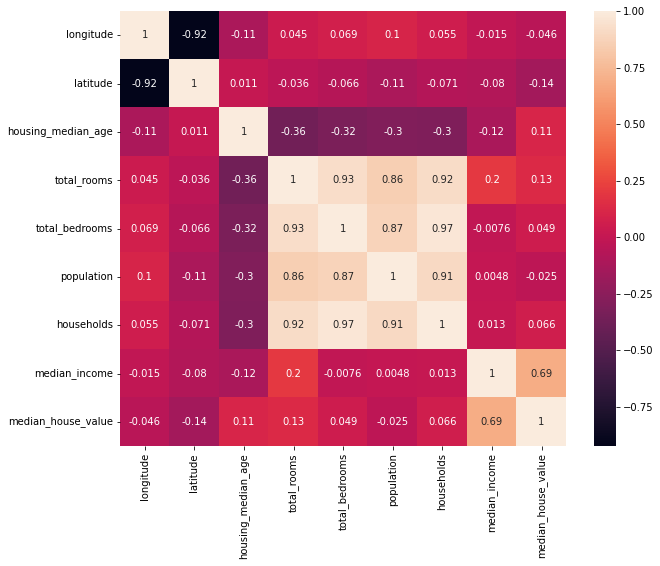

In [ ]:
correlation_matrix = house_dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation_matrix, annot=True)

 ### **Analysis of Correlation matrix:**
 - Notice that the correlation coefficients along the diagonal of the matrix are all equal to 1 because each variable is perfectly correlated with itself.
 - The correlation between total_rooms and total_bedroom is **0.93** which indicates that they’re strongly positively correlated.Higher the number of rooms indicate that higher number of  bedrooms.
 - The correlation between household and total_bedroom is **0.98** which indicates that they’re strongly positively correlated.Higher the number of households indicate that higher number of  bedrooms.
 - The correlation between median_house_value and longitude is **-0.046** which indicates that they’re strongly negatively correlated. 
 Higher the longitude value of house leads lowering the median_house_value.
 - Similarly we can analysis the relation of each variables from above correlation matrix.

# **Identification of Outliers:**
Outliers are the values that look different from the other values in the data.Outliers can drastically change the results of the data analysis and statistical modeling.
###**Interquartile range(IQR) method for outlier detection:**
Quartile is a type of quantile which divides the number of data points into four parts.

The first quartile (Q1) is defined as the middle number between the smallest number (minimum) and the median of the data set.It is also known as the lower or 25th empirical quartile, as 25% of the data is below this point.

Let’s say that we have a data set with N data points then,
- Lower/First Quartile (Q1) = (N+1) * 1 / 4

The second quartile (Q2) is also called median ; thus 50% of the data lies below this point.The median is the second quartile.
- Second Quartile/Median (Q2) = (N+1) * 1/2 


The third quartile (Q3) is the middle value between the median and the highest value (maximum) of the data set. It is known as the upper or 75th empirical quartile, as 75% of the data lies below this point.
- Upper/Third Quartile (Q3 )= (N+1) * 3 / 4

Now we can fine the requires IQR

- Inter Quartile Range (IQR) = 3rd Quartile - 1st Quartile
- Upper limit = 3rd Quartile + IQR * 1.5
- Lower limit = 1st Quartile - IQR * 1.5
- Any data above upper limit and below lower limit are called as outlier.


###**Seaborn’s boxplot method is used to find the outliers:**

Box Plot is the visual representation of the depicting groups of numerical data through their quartiles.It divides the data set into three quartiles.  Boxplot is also used for detect the outlier in data set.This is suitable for the **univariate outlier detection.** A univariate outlier is a data point that consists of an extreme value on one variable. 
####**Analysis of Boxplot**
- Blue box represent IQR,The box covers the interquartile interval, where 50% of the data is found.
- The left and right sides of the box are the lower and upper quartiles.
- Middle line  in the box represent the median.
- The whiskers are the two lines outside the box, the top and bottom whiskers represent the upper limit and lower limit respectively

- The values dots above the upper limit and below the lower limit are represent as the outliers.
- Median_house_value variable  used from dataset.

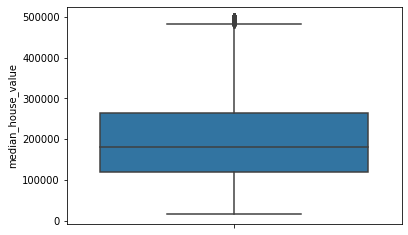

In [ ]:
sns.boxplot(y=house_dataset['median_house_value']) #Seaborn boxplot for outlier detection .

###**Distribution plot Method for Outliers Detection:**
- This is suitable for the **univariate outlier** detection.
- The extreme points in plot are called  the outliers.

- we can see that there are some long tail outliers in the data.
- Feature tota_rooms data point is used for visualization data and find the outliers in this households variables data point.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


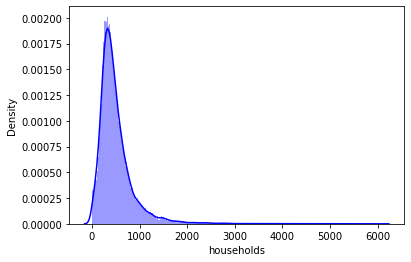

In [ ]:
sns.distplot(house_dataset['households'], kde = True, color ='blue',bins='auto') 

##**Scatter Plot technique to detect outlier:**

---



A scatter-plot  visualization technique is suitable for **multivariate outlier detection.**

A multivariate outlier is a combination of unusual scores on at least two variables.


### **Find Correlation for Scatter Plot:**
- The positive Correlation  features are more closer and move in same direction in other hand negative correlation features move in opposite direction.

- Scatter Plot help to find the outliers from positive correlation features which are move in same direction.
- If any data point far or move away from the other various  data point  in the positive correlation then this is called Outliers.

In [ ]:
house_dataset.corr()["median_house_value"] # find correlation between median_house_value column and all column of  dataset.

longitude            -0.045659
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134081
total_bedrooms        0.049457
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

- From above median_income and median_house_value have a positive correlation,so we can take this two features for outlier detection between these two data points.

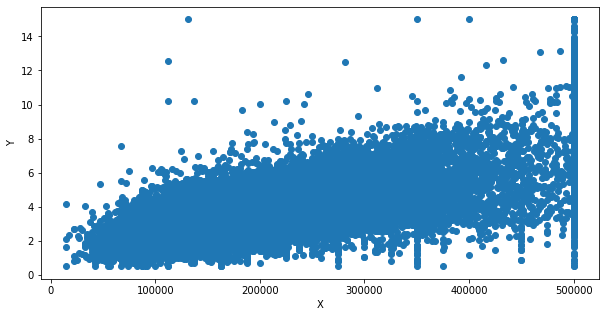

In [ ]:
figure,  ab= plt.subplots(figsize=(10,5))
ab.scatter(house_dataset['median_house_value'],house_dataset['median_income'])
ab.set_ylabel('Y')
ab.set_xlabel('X')
plt.show()

- From above scatter plot we can see that the data point far from the group of datas are called outliers.

##**Z- Score Method for Outlier Detection:**
- Z score is an important concept in statistics. Z score is also called standard score. 
- This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean.
-  More specifically, Z score tells **how many standard deviations away a data point is from the mean.**

- Z score = (x -mean) / std. deviation

-  $ Z = \frac{x - \mu }{\sigma} $
-  A standard cut-off value for finding outliers are Z-scores of **+/-3.**


**Mean and Standard Deviation:**

In [ ]:
mean=house_dataset['households'].mean()
print(mean)

499.5396802325581


In [ ]:
std=house_dataset['households'].std()
print(house_dataset['households'].std())


382.3297528316099


**Upper_value and Lower_value:**

In [ ]:
upper_value = house_dataset.households.mean() + 3*house_dataset.households.std()

lower_value = house_dataset.households.mean() -3*house_dataset.households.std()
print(upper_value)
print(lower_value)

1646.5289387273879
-647.4495782622716


**Z-Score of Each value:**

In [ ]:
house_dataset['zscore'] = ( house_dataset.households - house_dataset.households.mean() ) / house_dataset.households.std()
print(house_dataset['zscore'])

0       -0.977009
1        1.669921
2       -0.843616
3       -0.733764
4       -0.629142
           ...   
20635   -0.443438
20636   -1.008396
20637   -0.174037
20638   -0.393743
20639    0.079670
Name: zscore, Length: 20640, dtype: float64


**A standard cut-off value apply for finding outliers are Z-scores of +/-3.**
- Above 3 and below -3 Z -score values are called outliers.
- look at the below table and analysis the variable **householdes** the values above **upper_value(1646.5289387273879)** and values below **lower_value(-647.4495782622716)** are called outliers shown in **household** variables.

In [ ]:
house_dataset[house_dataset['zscore']>3] #Outliers values above upper_value or above 3 cutt-off value set.



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,zscore
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY,4.769339
104,-122.26,37.81,34.0,5871.0,1914.0,2689.0,1789.0,2.8406,335700.0,NEAR BAY,3.372639
116,-122.25,37.83,28.0,5022.0,1750.0,2558.0,1661.0,2.4234,218500.0,NEAR BAY,3.037850
283,-122.16,37.79,22.0,12842.0,2048.0,4985.0,1967.0,5.9849,371000.0,NEAR BAY,3.838206
485,-122.26,37.86,35.0,5161.0,1744.0,3276.0,1742.0,1.6307,253600.0,NEAR BAY,3.249709
...,...,...,...,...,...,...,...,...,...,...,...
20530,-121.76,38.57,11.0,15018.0,3008.0,7984.0,2962.0,3.1371,201800.0,INLAND,6.440671
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND,3.315097
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND,3.485108
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND,4.860883


In [ ]:
house_dataset[house_dataset['zscore']<-3]  # outliers below the lower_value or below -3 cutt-off value set.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,zscore


##**Some other techniques for Outliers detection:**
- Modified Z-Score Method
- Isolation Forest etc.


##**Outlier Handling:**
- Outliers badly affect mean and standard deviation of the dataset. These may statistically give erroneous results.
- It increases the error variance and reduces the power of statistical tests.
- Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers.


There are some techniques used to deal with outliers.

###**Removing/Trimming Outlier:**
- Sometimes it’s best to completely remove those records from your dataset to stop them from skewing your analysis. If dropping outliers do not affect your assumption in the dataset, then you can drop it.

- But deleting the observation is not a good idea when we have small dataset.
- This techinique is based  on completes IQR.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


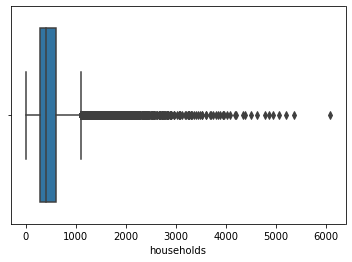

In [ ]:
sns.boxplot(house_dataset['households']) #Before Removing/Trimming.

**Finding the IQR:**

In [ ]:
percentile25 = house_dataset['households'].quantile(0.25)
percentile75 = house_dataset['households'].quantile(0.75)
IQR=percentile75-percentile25
print('IQR is', IQR)


IQR is 325.0


**Finding upper and lower limit:**

In [ ]:
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

print('low_limit is', lower_limit)
print('up_limit is', upper_limit)

low_limit is -207.5
up_limit is 1092.5



**Finding Outliers:**
- Look at the feature **households** the value in the **household** feature  are outliers.Compare this outliers values with orginal data set  we present in above.
- Since, we do not have outliers belows lowe_limits

In [ ]:
house_dataset[house_dataset['households'] > upper_limit]# Outliers above upper limit.



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,zscore
1,-118.49,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1.669921
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY,4.769339
96,-122.26,37.82,31.0,4596.0,1331.0,2048.0,1180.0,2.8345,183800.0,NEAR BAY,1.779773
98,-122.26,37.82,22.0,3682.0,1270.0,2024.0,1250.0,1.2185,170000.0,NEAR BAY,1.962861
100,-122.25,37.81,29.0,4656.0,1414.0,2304.0,1250.0,2.4912,257800.0,NEAR BAY,1.962861
...,...,...,...,...,...,...,...,...,...,...,...
20541,-121.70,38.54,13.0,6819.0,1158.0,2828.0,1115.0,4.6225,226500.0,INLAND,1.609763
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND,3.315097
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND,3.485108
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND,4.860883


- Since, we do not have outliers belows lower_limits as shown in below code and empty  table data set figure.





In [ ]:
house_dataset[house_dataset['households'] < lower_limit] # Outliers below lower limit.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,zscore


**Trimming:**
-  The data set free from outliers store in the  **new_house_dataset** variables and shape it.
- It excludes the outlier values from our analysis.

In [ ]:
new_house_dataset = house_dataset[house_dataset['households'] <=upper_limit]
new_house_dataset = house_dataset[house_dataset['households'] >=lower_limit]

new_house_dataset.shape

(19420, 11)

**Compare the plots after trimming:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

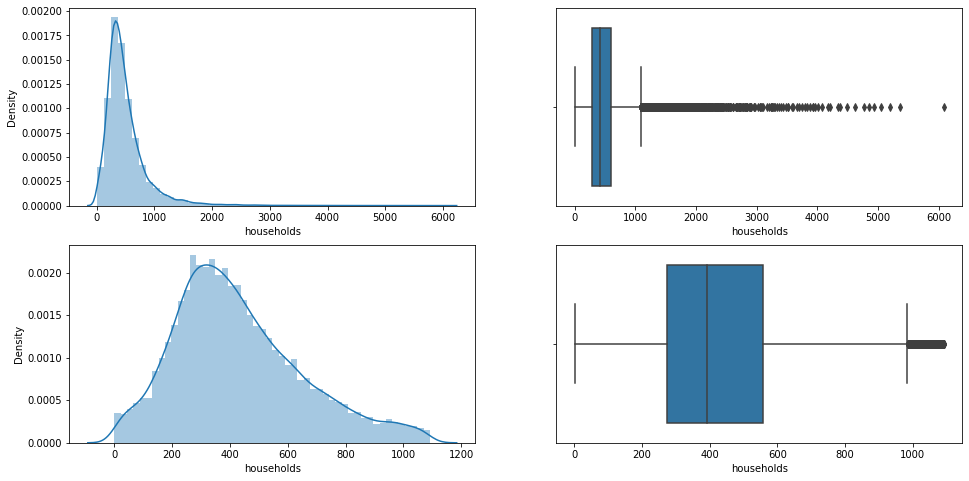

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(house_dataset['households'])
plt.subplot(2,2,2)
sns.boxplot(house_dataset['households'])
plt.subplot(2,2,3)
sns.distplot(new_house_dataset['households'])
plt.subplot(2,2,4)
sns.boxplot(new_house_dataset['households'])
plt.show()


**Capping:**
- In this technique **outliers above upper_limit are replace by upper_limit values and outliers below lower_limit are replace by lower_limit values**.
- After capping we store out required data in **new-house_dataset_cap** variables.




In [ ]:
new_house_dataset_cap =house_dataset.copy()
new_house_dataset_cap['households'] = np.where(new_house_dataset_cap['households'] >= upper_limit,
    upper_limit,
    np.where(new_house_dataset_cap['households'] <= lower_limit,
        lower_limit,
        new_house_dataset_cap['households']
    )
)


**Compare the plots after capping:**
- Finally we get our data free from outliers as shown in belows figures.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

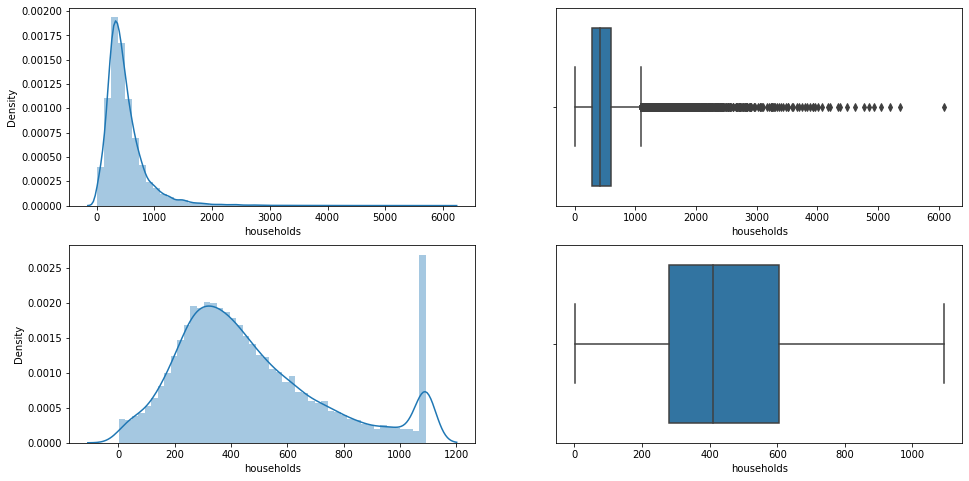

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(house_dataset['households'])
plt.subplot(2,2,2)
sns.boxplot(house_dataset['households'])
plt.subplot(2,2,3)
sns.distplot(new_house_dataset_cap['households'])
plt.subplot(2,2,4)
sns.boxplot(new_house_dataset_cap['households'])
plt.show()


- Long line shown after capping on  **distribution plot** because all the values accumulating at this maximum value.

##**Imputation with Median Values:**
- **In Positive/Right Skew =** Mean > Median > Mode
- **In Negative/Left Skew=** Mode >Median >Mean
- **In Symmetrical Distribution=** Mean $\approx$ Median$\approx$Mode

- Outliers data points will have a significant impact on the mean and hence, in such cases, it is not recommended to use the mean for replacing the outlier values. 
- Using mean values for replacing outliers values may not create a great model and hence gets ruled out.
- For symmetric data distribution, you can use the mean value for imputing outlier values
-Thus, you have to **use either median or mode in skew data points.**



- Like imputation of missing values, we can also impute outliers.
- In this technique, we replace the extreme values with median values. 
- It is advised to not use mean values as they are affected by outliers because  the mean of outliers present data is also may not good.
- The first line of code below prints the 50th percentile value, or the median, which comes out to be 409.

**Find The Median value:**
- The  line of code below prints the 50th percentile value, or the median, which comes out to be 409.

In [ ]:
print(house_dataset['households'].quantile(0.50)) #50th percentile value, or the median, which comes out to be 409.


409.0


**Find the upper_limit:**
- Since the value above upper_limit  and below the lower-limits are called outliers.
- Since we have outliers above the upper_limit in the features **households** but did not have outliers below the lower_limit in the features **households**.
- So we have to impute the outliers above the upper_limits with median values.
- We have upper_limit value 1092.5 

In [ ]:
percentile25 = house_dataset['households'].quantile(0.25)
percentile75 = house_dataset['households'].quantile(0.75)
IQR=percentile75-percentile25
print('IQR is', IQR)
upper_limit = percentile75 + 1.5 * IQR 
lower_limit = percentile25 - 1.5 * IQR

print('low_limit is', lower_limit)
print('up_limit is', upper_limit)

IQR is 325.0
low_limit is -207.5
up_limit is 1092.5


**Replaces outliers with median values:**
- The line of code below replaces all those values in the **'households'** variable, which are greater than the 1092.5(upper_limit), with the median value(409).
- Finally, the below code line prints summary statistics after all these techniques have been employed for outlier treatment.
- we can see the maximum vaule in **households** variables is 1092,   that means the outliers above upper_limits are replaced by median values.

In [ ]:
house_dataset['households'] = np.where(house_dataset['households'] > 1092.5, 409, house_dataset['households'])
print(house_dataset['households'])


0        126.0
1        409.0
2        177.0
3        219.0
4        259.0
         ...  
20635    330.0
20636    114.0
20637    433.0
20638    349.0
20639    530.0
Name: households, Length: 20640, dtype: float64


##**Finally:**
Apply above techniques in all features/variables to get clean data free from outliers and missing data. After getting clean data we can save the data into csv file with the help of code. This new pure data can be used in further purpose.



In [ ]:
type(house_dataset['households']) # then final pure data save into csv file for model training or future purpose, save in left side of colab then download from their on local.


pandas.core.series.Series

#**Normalization(Min-Max Scaling)**

In [ ]:
import scipy.stats as stats 

In [ ]:
def cardataset_plot(dataframe, variable):     # creat function and set parameters 'dataframe" and 'variables"
    plt.figure(figsize=((16,5)))
    plt.subplot(121)
    dataframe[variable].hist(bins=20)
    plt.xlabel(variable)
    plt.ylabel("countPoints", rotation=0)
    plt.subplot(122)
    stats.probplot(dataframe[variable], plot=plt)
    
    plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))         #creat object variable "scaler"
house_dataset["Normalization_households"] =scaler.fit_transform(house_dataset[["households"]])
scaler_df=pd.DataFrame(scaler.fit_transform(house_dataset[["households"]]))  ##Convert numpy array generated by sklearn libraries to orginal dataframe.

print(house_dataset)

       longitude  latitude  ...    zscore  Normalization_households
0        -118.49     37.88  ... -0.977009                  0.114574
1        -118.49     37.86  ...  1.669921                  0.373969
2        -122.24     37.85  ... -0.843616                  0.161320
3        -122.25     37.85  ... -0.733764                  0.199817
4        -122.25     37.85  ... -0.629142                  0.236480
...          ...       ...  ...       ...                       ...
20635    -121.09     39.48  ... -0.443438                  0.301558
20636    -121.21     39.49  ... -1.008396                  0.103575
20637    -121.22     39.43  ... -0.174037                  0.395967
20638    -121.32     39.43  ... -0.393743                  0.318973
20639    -121.24     39.37  ...  0.079670                  0.484876

[20640 rows x 12 columns]


In [ ]:
newscaler_df=house_dataset.join(scaler_df) # join the old dataset with new Normalization_km variable.
print(newscaler_df)


       longitude  latitude  ...  Normalization_households         0
0        -118.49     37.88  ...                  0.114574  0.114574
1        -118.49     37.86  ...                  0.373969  0.373969
2        -122.24     37.85  ...                  0.161320  0.161320
3        -122.25     37.85  ...                  0.199817  0.199817
4        -122.25     37.85  ...                  0.236480  0.236480
...          ...       ...  ...                       ...       ...
20635    -121.09     39.48  ...                  0.301558  0.301558
20636    -121.21     39.49  ...                  0.103575  0.103575
20637    -121.22     39.43  ...                  0.395967  0.395967
20638    -121.32     39.43  ...                  0.318973  0.318973
20639    -121.24     39.37  ...                  0.484876  0.484876

[20640 rows x 13 columns]


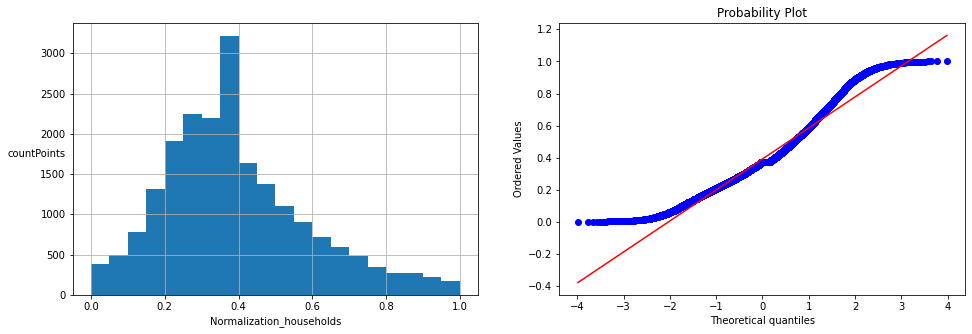

In [ ]:
cardataset_plot(newscaler_df,"Normalization_households")